<a href="https://colab.research.google.com/github/anazantoro/2109116058_Firzian-Ananta_DataMining/blob/main/2109116058_Firzian_Caesar_Ananta_Posttest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anazantoro/dataset-dm/main/dataset-ps2-dm-main/posttest2-_1_.csv")
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.sum() # untuk menghitung value pada masing kolom

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [4]:
df.columns # untuk melihat kolom apa saja yang ada

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [5]:
# untuk membuat kombinasi dari keseluruhan barang yang ada
from itertools import permutations
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [6]:
# untuk menyimpan kombinasi data dalam bentuk list
new_rule = []
for rule in rules: # perulangan untuk menentukan keadaan dari kombinasi data
  if len(df[(df[rule[0]]== 1) & (df[rule[1]] == 1)]) > 0:
    new_rule.append(rule)
  new_rule

In [7]:
# untuk menyimpan data dalam bentuk dictionary
dict_equ = {}
for rule in new_rule: # perulangan untuk menentukan jumlah keadaan kombinasi
  length_data = len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
  ])
  dict_equ[str(rule)] = length_data # menambahkan hasil dari perulangan ke dalam dictionary
dict_equ

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [8]:
len(df) # jumlah transaksi

19

In [9]:
# perulangan pada tiap kombinasi dataset serta menghitung support dari kombinasinya
for item,ab in dict_equ.items():
  print(f"{item} support = {ab/len(df)*100}% ")

('whole milk', 'pasrty') support = 5.263157894736842% 
('whole milk', 'salty snack') support = 5.263157894736842% 
('whole milk', 'sausage') support = 10.526315789473683% 
('whole milk', 'semi-finished bread') support = 5.263157894736842% 
('whole milk', 'yogurt') support = 5.263157894736842% 
('whole milk', 'soda') support = 5.263157894736842% 
('whole milk', 'rolls/buns') support = 5.263157894736842% 
('whole milk', 'butter') support = 5.263157894736842% 
('pasrty', 'whole milk') support = 5.263157894736842% 
('pasrty', 'salty snack') support = 5.263157894736842% 
('salty snack', 'whole milk') support = 5.263157894736842% 
('salty snack', 'pasrty') support = 5.263157894736842% 
('salty snack', 'root vegetables') support = 5.263157894736842% 
('salty snack', 'detergent') support = 5.263157894736842% 
('sausage', 'whole milk') support = 10.526315789473683% 
('sausage', 'semi-finished bread') support = 5.263157894736842% 
('sausage', 'yogurt') support = 5.263157894736842% 
('sausage', '

In [10]:
# perulangan pada tiap kombinasi dataset serta menghitung confidence pada tiap kombinasi item yang ada
for item,ab in dict_equ.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pasrty Confidence = 20.0%
whole milk->salty snack Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->semi-finished bread Confidence = 20.0%
whole milk->yogurt Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->butter Confidence = 20.0%
pasrty->whole milk Confidence = 100.0%
pasrty->salty snack Confidence = 100.0%
salty snack->whole milk Confidence = 50.0%
salty snack->pasrty Confidence = 50.0%
salty snack->root vegetables Confidence = 50.0%
salty snack->detergent Confidence = 50.0%
sausage->whole milk Confidence = 50.0%
sausage->semi-finished bread Confidence = 25.0%
sausage->yogurt Confidence = 25.0%
sausage->hygiene articles Confidence = 25.0%
sausage->rolls/buns Confidence = 50.0%
semi-finished bread->whole milk Confidence = 100.0%
semi-finished bread->sausage Confidence = 100.0%
semi-finished bread->yogurt Confidence = 100.0%
yogurt->whole milk Confidence = 100.0%
yogurt->sausage Confidence = 1

# (2) KNN

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [12]:
df2 = pd.read_csv("https://raw.githubusercontent.com/anazantoro/dataset-dm/main/dataset-ps2-dm-main/deteksi_uang_palsu.csv")
df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [13]:
# membuat dataframe berdasarkan ketentuan
data = pd.DataFrame({'diagonal': [172.25],
                      'height_left': [103.94],
                      'height_right': [103.68],
                      'margin_low': [4.14],
                      'margin_up': [3.25],
                      'length': [112.48]})

In [14]:
# untuk menghitung jarak dari baris - baris dataframe main dan data baru
distances = []
for i in range(len(df2)):
    row = df2.iloc[i]
    distance = np.sqrt((row['diagonal'] - data['diagonal']) ** 2 +
                       (row['height_left'] - data['height_left']) ** 2 +
                       (row['height_right'] - data['height_right']) ** 2 +
                       (row['margin_low'] - data['margin_low']) ** 2 +
                       (row['margin_up'] - data['margin_up']) ** 2 +
                       (row['length'] - data['length']) ** 2)
    distances.append(distance)

In [15]:
# untuk menambahkan kolom distance ke dataframe main
df2['distance'] = distances

In [16]:
# menampilkan dari tabel jarak
print('Tabel Jarak :')
print(df2['distance'])

Tabel Jarak :
0    0    0.671267
dtype: float64
1    0    1.458321
dtype: float64
2    0    0.834626
dtype: float64
3    0    0.910934
dtype: float64
4    0    1.312593
dtype: float64
5    0    2.421281
dtype: float64
6    0    1.741896
dtype: float64
7    0    1.113463
dtype: float64
8    0    1.722034
dtype: float64
9    0    1.738217
dtype: float64
Name: distance, dtype: object


In [17]:
# mengatur pandas untuk menampilkan seluruh kolom 
pd.set_option("display.max_columns", None)
# mengatur tampilan lebar dari tabel menjadi 200 
pd.set_option('display.width', 200)

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0 0.671267 dtype: float64
1,True,171.66,103.68,103.41,4.35,3.33,113.74,0 1.458321 dtype: float64
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0 0.834626 dtype: float64
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0 0.910934 dtype: float64
4,True,171.79,104.57,104.04,4.26,3.15,113.46,0 1.312593 dtype: float64
5,False,172.00,104.23,104.52,5.76,3.37,110.94,0 2.421281 dtype: float64
6,False,171.56,104.03,103.93,5.47,3.50,111.67,0 1.741896 dtype: float64
7,False,171.90,104.33,104.40,4.70,3.31,112.12,0 1.113463 dtype: float64
8,False,171.84,104.06,104.10,4.87,3.25,111.04,0 1.722034 dtype: float64
9,False,172.11,104.14,104.15,4.84,3.28,110.98,0 1.738217 dtype: float64


In [18]:
# mengitung jarak dari baris dataframe main dan data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)


In [19]:
# mengurutkan data dari terkecil ke besar dan mencari data terdekat
k = int(np.sqrt(len(df2)))
nd = df2.sort_values('distance').head(k)

print(nd)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [20]:
# membelah data menjadi data training dan data testing
x_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']
test_data = data

# membuat variable untuk algoritma knn 
knn = KNeighborsClassifier(n_neighbors=k)
# memprediksi hasil dari algoritma knn
knn.fit(x_train, y_train)

print("Hasil Prediksi : True ")
print("Hasil Prediksi Akhir : "+ ' '.join(map(str, knn.predict(test_data))))

Hasil Prediksi : True 
Hasil Prediksi Akhir : True


# (3) Analisis

Nama : Firzian Caesar 

NIM  : 2109116058

Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Analyse

### Business Understanding

Dataset ini adalah kumpulan data tentang pelanggan bank dan apakah mereka telah meninggalkan bank atau tidak (churn). Business understanding dari dataset ini dapat membantu bank dalam memahami faktor-faktor yang menyebabkan churn pelanggan dan mengambil tindakan untuk mempertahankan pelanggan.

Dalam konteks bisnis, pemahaman ini dapat membantu bank dalam:

1.Mengurangi biaya akuisisi pelanggan baru

2.Meningkatkan pendapatan melalui retensi pelanggan

3.Memperbaiki layanan dan pengalaman pelanggan


**Goals : **

Tujuan dari melakukan data mining dari dataset bank customer churn adalah untuk menemukan pola dan tren dalam perilaku pelanggan yang terkait dengan churn, serta mengidentifikasi faktor-faktor yang memengaruhi churn pelanggan di industri perbankan.


### Data Understanding

1. Memilih Data
2. Penjelasan Kolom Data
3. Visualisasi

In [21]:
df3 = pd.read_csv("https://raw.githubusercontent.com/anazantoro/dataset-dm/main/dataset-ps2-dm-main/Bank%20Customer%20Churn%20Prediction.csv")

df3

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Deskripsi Kolom

In [22]:
df3.info()

# Dataset ini berisi 10 variable atau kolom, dengan deskripsi sebagai berikut :
# 1. customer_id : ID 
# 2. credit_score: Skor kredit pelanggan
# 3. country: Negara tempat pelanggan tinggal (dalam dataset ini hanya terdapat tiga negara: Prancis, Jerman, dan Spanyol)
# 4. gender: Jenis kelamin pelanggan
# 5. age: Usia pelanggan
# 6. tenure: Masa kerja pelanggan di bank (dalam tahun)
# 7. balance: Saldo rekening pelanggan
# 8. products_number: Jumlah produk yang dimiliki pelanggan di bank
# 9. credit_card: Apakah pelanggan memiliki kartu kredit atau tidak (1: ya, 0: tidak)
# 10. active_member: Apakah pelanggan masih aktif menggunakan layanan bank (1: ya, 0: tidak)
# 11. estimated_salary: Perkiraan gaji tahunan pelanggan
# 12. Apakah pelanggan telah keluar dari bank (1: ya, 0: tidak)

# dataset ini memiliki beberapa tipe yaitu : int, float , object serta terdapat value 10000 pada setiap kolom yang dimana tidak ada value yang kosong pada kolom.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [23]:
df3.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


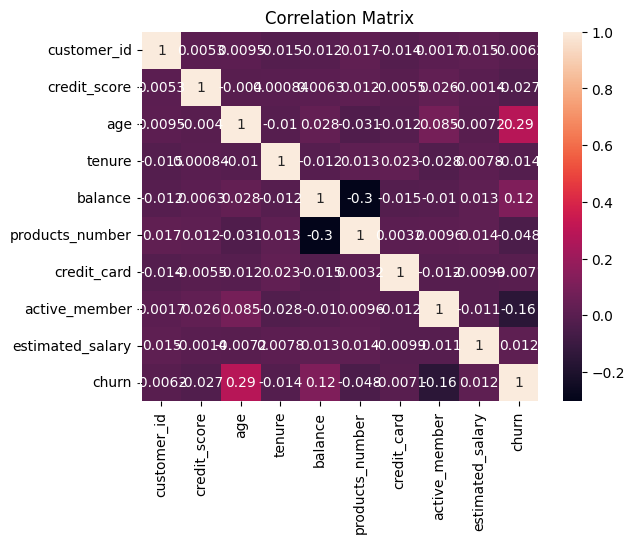

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df3.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# heatmap digunakan untuk mencari pola keterkaitan antara kolom kolom yang ada  

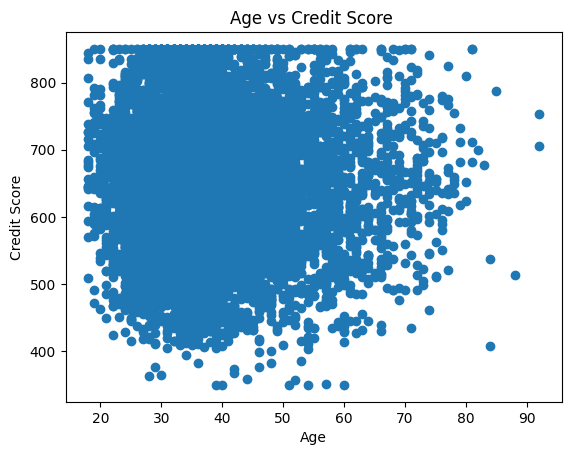

In [26]:

# Create Scatterplot for age & credit_score columns
plt.scatter(df3["age"], df3["credit_score"])
plt.title("Age vs Credit Score ")
plt.xlabel("Age")
plt.ylabel("Credit Score")
plt.show()

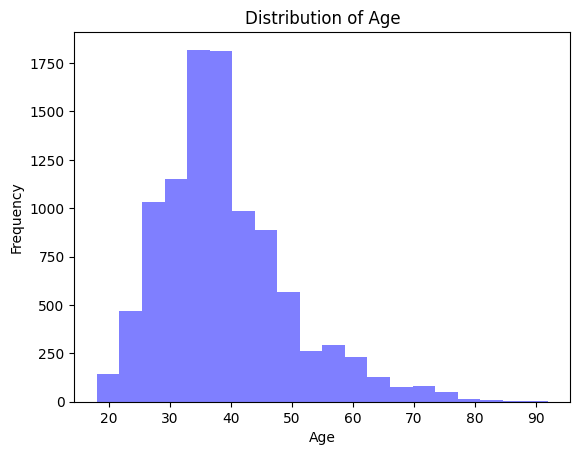

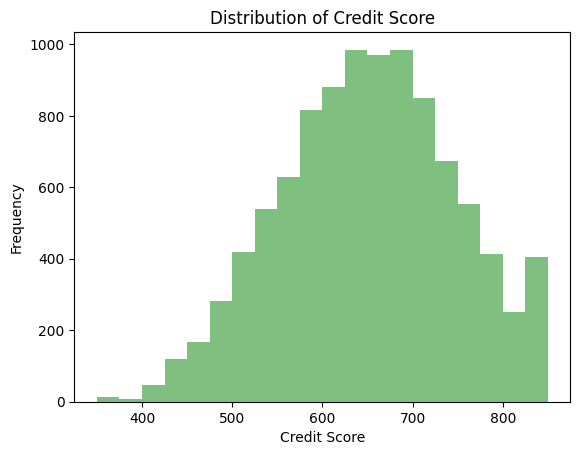

In [27]:
# Create histogram for age
plt.hist(df3['age'], bins=20, alpha=0.5, color='b')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Create histogram for credit_score
plt.hist(df3['credit_score'], bins=20, alpha=0.5, color='g')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
plt.show()

##### Dari histogram tersebut, dapat dilihat distribusi data pada kolom "age" cenderung mengikuti pola normal distribution (bell curve) dengan rentang usia pelanggan terbanyak berkisar di antara 30-40 tahun. Sedangkan pada kolom "credit_score" distribusi data cenderung merata dengan beberapa nilai yang cukup rendah dan tinggi.

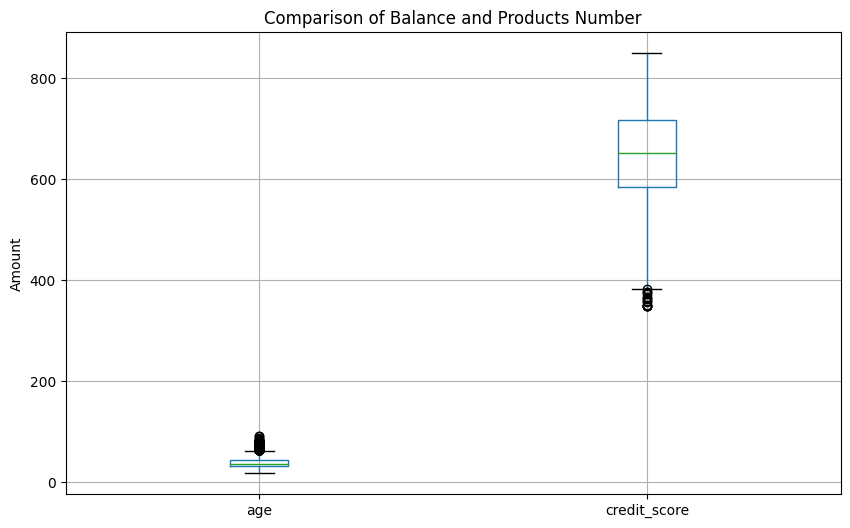

In [28]:
# Create Boxplot to compare age and credit score
fig, ax = plt.subplots(figsize=(10, 6))
df3.boxplot(column=['age', 'credit_score'], ax=ax)
ax.set_title('Comparison of Balance and Products Number')
ax.set_ylabel('Amount')
plt.show()

##### dapat dilihat bahwa kolom "age" memiliki distribusi data yang cukup merata, sedangkan kolom "credit_score" memiliki beberapa outlier yang cukup signifikan. Hal ini menunjukkan bahwa pelanggan dengan umur yang lebih muda cenderung memiliki skor kredit yang lebih rendah, namun terdapat beberapa pelanggan dengan umur yang sama namun memiliki skor kredit yang sangat tinggi.

### Data **Preparation**

In [29]:
df3.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Cleaning Data

In [30]:
#menghapus kolom customer_id
df3.drop(columns=["customer_id"], axis=1, inplace=True)

df3


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##### kolom "customer_id" dihapus karena tidak memberikan informasi yang berguna untuk analisis data. Nomor identifikasi pelanggan ini hanya berfungsi untuk keperluan administratif atau pemrosesan data internal di dalam perusahaan, sehingga tidak perlu dipertahankan dalam analisis data.